###목표
- 사전 로컬환경에서 만들어둔 npz파일을 불러와서 신경망에 넣어 예측, 학습해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.load('/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정/data/animals.npz')

In [3]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 224, 224, 3), (240, 224, 224, 3), (960,), (240,))

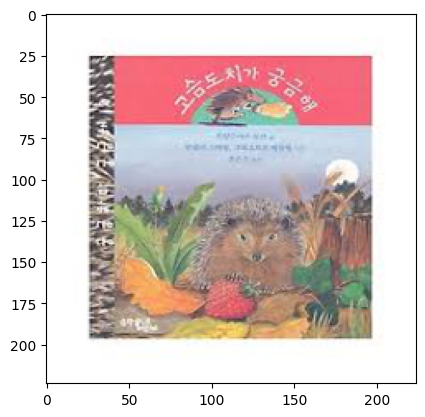

In [34]:
plt.imshow(X_train[1])

In [10]:
X_train[3]
# 가장 내부 배열은 R,G,B값에 따른 각각의 수치값들(세개의 수치로 하나의 픽셀의 색상을 최종결정)
# 그 다음 배열은 가로 한줄의 픽셀값
# 최종 배열은 이미지 전체의 픽셀들을 표

array([[[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 60,  20,  32],
        [ 67,  30,  38],
        [ 38,   5,   9]],

       [[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 57,  23,  33],
        [ 64,  32,  38],
        [ 33,   5,   8]],

       [[ 12,   0,   2],
        [ 13,   0,   2],
        [ 15,   0,   2],
        ...,
        [ 52,  26,  32],
        [ 57,  35,  37],
        [ 26,   6,   8]],

       ...,

       [[166, 145,  90],
        [167, 146,  91],
        [169, 148,  93],
        ...,
        [176, 147,  81],
        [173, 144,  76],
        [173, 144,  76]],

       [[164, 143,  88],
        [164, 143,  88],
        [166, 145,  90],
        ...,
        [176, 146,  80],
        [173, 144,  76],
        [173, 144,  76]],

       [[162, 141,  86],
        [162, 141,  86],
        [164, 143,  88],
        ...,
        [175, 146,  80],
        [173, 144,  76],
        [173, 144,  76]]

###색의 가산혼합
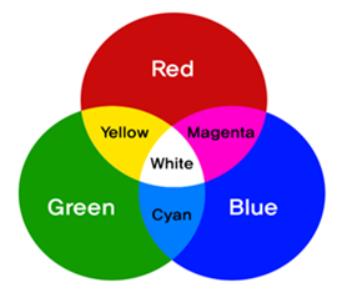

MLP로 분류

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [47]:
model = Sequential()

model.add(Flatten(input_shape =(224, 224, 3)))

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [48]:
# sparse_categorical_crossentropy : 정답의 원핫 인코딩까지 같이 지원
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [49]:
h = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 4s 92ms/step - loss: 8320.5820 - acc: 0.3529 - val_loss: 12456.2295 - val_acc: 0.3229
Epoch 2/100
6/6 [==============================] - 0s 51ms/step - loss: 8198.9453 - acc: 0.3008 - val_loss: 8506.2354 - val_acc: 0.3229
Epoch 3/100
6/6 [==============================] - 0s 42ms/step - loss: 5901.7993 - acc: 0.3659 - val_loss: 2330.8616 - val_acc: 0.3646
Epoch 4/100
6/6 [==============================] - 0s 47ms/step - loss: 3561.6941 - acc: 0.3672 - val_loss: 7819.3569 - val_acc: 0.3125
Epoch 5/100
6/6 [==============================] - 0s 39ms/step - loss: 4184.2231 - acc: 0.3581 - val_loss: 5987.4395 - val_acc: 0.3125
Epoch 6/100
6/6 [==============================] - 0s 39ms/step - loss: 4367.2593 - acc: 0.3359 - val_loss: 6689.2632 - val_acc: 0.3229
Epoch 7/100
6/6 [==============================] - 0s 39ms/step - loss: 5130.5557 - acc: 0.3047 - val_loss: 5730.7344 - val_acc: 0.3125
Epoch 8/100
6/6 [==============================

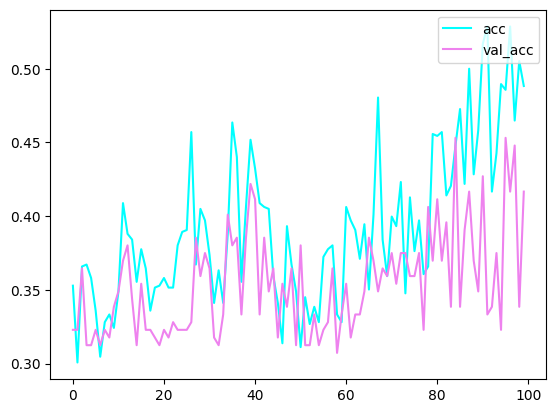

In [50]:
plt.plot(h.history['acc'], label='acc',color='cyan')
plt.plot(h.history['val_acc'], label='val_acc',color='violet')
plt.legend(loc='upper right')
plt.show()

In [6]:
# 정확도 외에 정밀도, 재현율, F!스코어 까지 확인
from sklearn.metrics import classification_report

In [7]:
pre = model.predict(X_test)
pre

NameError: ignored

In [53]:
# argmax : 가장 큰값의 인덱스를 변환해주는 함수
# axis=1 : 예측값이 2차원 배열이므로 열방향(좌->우)인 값들 중에서 비교하겠다는 뜻
np.argmax(pre, axis=1)

array([1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0,
       2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0])

In [54]:
print(classification_report(y_test, np.argmax(pre,axis=1)))
# support : 데이터의 개수
# pre 값이 각 클래스에 대한 확률로 나오기 떄문에 그 중 가장 높은 값의 인덱스와 실제 정답을 비교하는 방식

              precision    recall  f1-score   support

           0       0.37      0.57      0.45        79
           1       0.43      0.49      0.46        80
           2       0.35      0.11      0.17        81

    accuracy                           0.39       240
   macro avg       0.38      0.39      0.36       240
weighted avg       0.38      0.39      0.36       240



기존 MLP로는 3채널의 컬러이면서 배경이 전부 다른 다양한 이미지들을 분류하는데 어려움이 있음

CNN 모델링

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [6]:
cnn_model = Sequential()

# 1. 특성추출부(Conv - 특징이 되는 정보를 추출)
# filters : 필터의 개수
# kernel_size: 필터의 크기
# padding = 'same' : 원본데이터의 크기에 맞춰 알아서 패딩을 적용 (valid: 패딩적용x)
cnn_model.add(Conv2D(input_shape=(224,224,3), filters=128, kernel_size=(3,3), padding='same', activation='relu'))

# 2. 특성추출부(Pooling - 불필요한 정보를 삭제)
# pool_size : 디폴트 값은 (2x2)
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D())

# 3. MLP(분류기)
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.summary()

# cnn층 파라미터 수 계산
# 필터 크기(가로+세로+입력데이터의 채널수) + 필터개수 + 필터개수(b)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [7]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [8]:
cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
6/6 [==============================] - 37s 2s/step - loss: 11.3161 - acc: 0.3516 - val_loss: 1.1051 - val_acc: 0.3646
Epoch 2/20
6/6 [==============================] - 5s 836ms/step - loss: 1.1096 - acc: 0.3372 - val_loss: 1.1132 - val_acc: 0.3229
Epoch 3/20
6/6 [==============================] - 5s 815ms/step - loss: 1.1002 - acc: 0.3372 - val_loss: 1.0983 - val_acc: 0.3229
Epoch 4/20
6/6 [==============================] - 5s 825ms/step - loss: 1.0987 - acc: 0.3372 - val_loss: 1.0983 - val_acc: 0.3229
Epoch 5/20
6/6 [==============================] - 5s 822ms/step - loss: 1.0987 - acc: 0.3372 - val_loss: 1.0983 - val_acc: 0.3229
Epoch 6/20
6/6 [==============================] - 5s 822ms/step - loss: 1.0987 - acc: 0.3372 - val_loss: 1.0983 - val_acc: 0.3229
Epoch 7/20
6/6 [==============================] - 5s 831ms/step - loss: 1.0987 - acc: 0.3372 - val_loss: 1.0983 - val_acc: 0.3229
Epoch 8/20
6/6 [==============================] - 5s 833ms/step - loss: 1.0987 - acc: 0.337

In [1]:
pre = cnn_model.predict(X_test)
print(classification_report(y_test, np.argmax(pre,axis=1)))

NameError: ignored

CNN 신경망이지만 직접 만든 모델로 한번에 좋은 결과를 얻기는 힘들다